In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
from sklearn.metrics import accuracy_score

from models import kNN, ggNN, sggNN
from models import NN #64.74609375

/home/josegfer/miniconda3/envs/lusiadas/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
H_train = torch.load('data/H_train.pt')
y_train = torch.load('data/y_train.pt')
s_train = torch.load('data/s_train.pt')

H_test = torch.load('data/H_test.pt')
y_test = torch.load('data/y_test.pt')
s_test = torch.load('data/s_test.pt')

In [3]:
model = kNN(k = 100)
model.fit(H_train, y_train)
yhat = model.clf(H_test)
accuracy_score(y_test, yhat)

100%|██████████| 10000/10000 [00:40<00:00, 245.74it/s]


0.6319

In [3]:
model = ggNN()
model._gg(path = 'data/gg_test_bootstrap_05.pt')
model.fit(H_train, y_train)
yhat = model.clf(H_test)
accuracy_score(y_test, yhat)

100%|██████████| 10000/10000 [00:03<00:00, 3315.64it/s]


0.6179

In [4]:
gg = model.gg.numpy()
np.mean(np.sum(gg, axis = 1)), np.std(np.sum(gg, axis = 1))

(157.37, 115.58367661568826)

In [5]:
model = sggNN(tau = 0.2)
model._gg(path = 'data/gg_test_bootstrap_05.pt')
model.fit(H_train, y_train)
yhat = model.clf(H_test)
accuracy_score(y_test, yhat)

100%|██████████| 10000/10000 [00:21<00:00, 459.77it/s]


0.6363

In [ ]:
grid = np.logspace(start = -2, stop = 0.75, num = 100)
# grid = [0.1, 1]
log = []
for param in tqdm(grid):
    model = sggNN(tau = param)
    model._gg()
    model.fit(H_train, y_train)
    yhat = model.clf(H_test, progress = False)
    log.append(accuracy_score(y_test, yhat))

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [29:24<00:00, 17.65s/it]


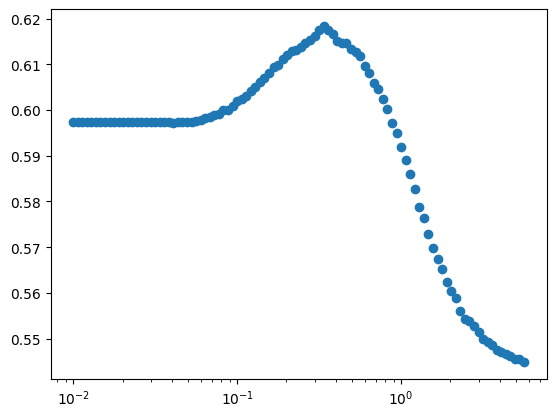

In [30]:
log = np.array(log)
plt.figure()
plt.scatter(grid, log);
plt.xscale('log');